In [55]:
#Sparse auto-associative neural network


import numpy as np
import matplotlib.pyplot as plt
from math import sqrt


nn=500                         #number of nodes
a=0.1                          #the sparseness
npat=40                        #the number of patterns to be learned
cc=np.zeros((1,21))            #Initialsing Inhibition Constant
aret=np.zeros((21,10))         #Initialising Retrieval Sparseness
hd=np.zeros((21,10))           #Initialising Hamming Distance


for irun in range (0,10):                      #Results are to be averaged over 10 runs
  pat=np.zeros((nn,npat))                      #all pattern values set to zero
  
  for i in range(0,npat):
    idx=np.random.permutation(nn)              #random permutation of indices for each pattern vector
    pat[idx[0:50],i]=1                         #setting the first ann random components to 1


  w=np.matmul((pat-a),np.transpose(pat-a))     #Hebbian covariance rule 
  w=w/sqrt(npat)                               #standard normalisation
  ic=-1

  for c in np.arange(0,0.21,0.01):             #experiment with differenct inhibition constants
    ic+=1
    cc[0,ic]=c
    s=np.array(pat[:,0]).reshape((500,1))      #noisy version of the first pattern
    s[0:10]=1-s[0:10]

    
    for t in range(0,10):
      s=((np.matmul((w-c),s))>0)*1             #updating the network 10 times
      
    #Update network
    aret[ic,irun]=s.sum(axis=0)/nn                                                                   #calculates the retrieval sparseness
    hd[ic,irun]=(np.matmul(np.transpose(1-s),pat[:,0])+np.matmul(np.transpose(s),(1-pat[:,0])))/nn   #calculates the normalized Hamming distance
    




In [56]:
#Reshaping the data points for plotting

cc=np.transpose(cc)

aret_mean=np.mean(np.transpose(aret), axis=0).reshape((21,1))
aret_std=np.std(np.transpose(aret), axis=0)

hd_mean=np.mean(np.transpose(hd), axis=0).reshape((21,1))
hd_std=np.std(np.transpose(hd), axis=0)

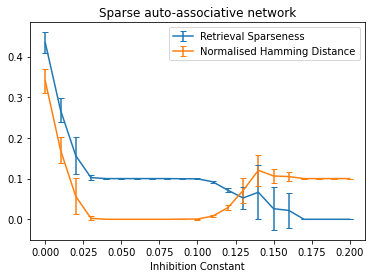

In [61]:
##Plotting the results


plt.errorbar(cc,aret_mean,yerr=aret_std,capsize=3, label="Retrieval Sparseness")
plt.errorbar(cc,hd_mean,yerr=hd_std,capsize=3, label="Normalised Hamming Distance")

plt.title("Sparse auto-associative network")
plt.xlabel("Inhibition Constant")
plt.legend()
plt.show()